## Load Packages

In [1]:
import glob
import os.path
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import classification_report
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
df = pd.concat(map(pd.read_csv, glob.glob('data*.csv')))

## Data Cleaning

### Data Exploration

In [3]:
df.shape

(415229, 19)

In [4]:
df.head()

,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue
0,2162571.0,353223,13,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-07-31,29,150006.818492,0.958562,135002.45459
1,2162571.0,353223,14,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-08-31,29,150006.818492,0.945827,135002.45459
2,2162571.0,353223,19,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-01-31,30,150006.818492,0.928933,135002.45459
3,2162571.0,353223,23,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-05-31,30,150006.818492,0.939887,135002.45459
4,2162571.0,353223,28,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-10-31,30,150006.818492,0.940731,135002.45459


In [5]:
# randomly selet samples to view data
df.sample(n = 2000) 

,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue
65084,8.216391e+08,2210916,59,3.85,NaN,92750.00,3591.0,NaN,350000.00,82984.40,92750.0,2036-03-01,2006-02-09,NB,2010-12-31,58,139118.044098,1.018796,125882.193268
47861,8.258001e+08,2219460,22,3.60,NaN,30094.00,1805.0,NaN,161699.00,44535.98,30094.0,2036-01-01,2005-12-01,NB,2007-09-30,40,36848.291906,1.080148,33501.057553
11883,8.597901e+08,2293741,32,4.30,NaN,33750.00,275.0,NaN,232000.00,33472.89,33750.0,2036-04-01,2006-03-30,NB,2008-10-31,37,30695.770805,1.064788,27639.014004
87242,8.709731e+08,2317290,18,5.50,NaN,25000.00,357.0,NaN,267000.00,36334.24,25000.0,2038-05-01,2008-04-22,NH,2009-09-30,36,22096.517589,0.960849,19850.722566
31555,7.210741e+08,2000294,62,4.15,1.0,18500.00,2462.0,423.65,122500.00,NaN,18500.0,2035-02-01,2005-01-17,ZH,2010-02-28,32,16612.787356,1.075734,14702.376222
44800,9.165901e+08,696450,73,4.40,NaN,115000.00,3154.0,NaN,225000.00,59214.99,115000.0,2030-10-01,2006-09-07,OJ,2012-09-30,40,112955.505353,0.900256,101706.907226
93934,1.255385e+09,3124043,22,3.90,NaN,140000.00,-80.0,NaN,140000.00,22525.58,140000.0,2041-02-01,2011-01-19,ZH,2012-10-31,48,283975.659229,0.851027,283975.659229
29834,1.047838e+09,2698226,50,5.25,NaN,135000.00,1685.0,NaN,209000.00,47134.28,135000.0,2037-08-01,2007-07-20,ZH,2011-08-31,46,122727.300000,0.952876,109809.700000
55481,1.093661e+09,2793358,3,5.15,NaN,83968.00,1380.0,NaN,183800.00,45746.79,83968.0,2038-01-01,2007-12-11,NB,2008-02-29,40,114211.099021,1.016452,102788.591015
84631,1.083096e+09,2771078,28,5.20,NaN,258000.00,102.0,NaN,358000.00,36861.36,258000.0,2038-08-01,2008-07-31,NB,2010-10-31,32,234226.055379,0.947201,208991.494532


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415229 entries, 0 to 103807
Data columns (total 19 columns):
DebtID                   415229 non-null float64
ConsumerID               415229 non-null int64
LoanAge                  415229 non-null int64
InterestRate             415229 non-null float64
NumberMonthsInArrears    10472 non-null float64
CurrentBalance           415229 non-null float64
EstDisposableIncome      412171 non-null float64
ArrearsBalance           10472 non-null float64
TotalExposure            415229 non-null float64
IndexedTotalIncome       372996 non-null float64
OriginalBalance          415229 non-null float64
MaturityDate             415229 non-null object
LoanOriginationDate      415229 non-null object
PropertyRegion           413362 non-null object
ReportDate               415229 non-null object
ConsumerAge              415229 non-null int64
OriginalPropertyValue    415229 non-null float64
PropertyIndexFactor      412329 non-null float64
ForeclosureValue   

In [7]:
# Convert some data formats
df['ReportDate'] = df['ReportDate'].astype('datetime64[ns]')
df['MaturityDate'] = df['MaturityDate'].astype('datetime64[ns]')
df['LoanOriginationDate'] = df['LoanOriginationDate'].astype('datetime64[ns]')
df['DebtID']=df['DebtID'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415229 entries, 0 to 103807
Data columns (total 19 columns):
DebtID                   415229 non-null object
ConsumerID               415229 non-null int64
LoanAge                  415229 non-null int64
InterestRate             415229 non-null float64
NumberMonthsInArrears    10472 non-null float64
CurrentBalance           415229 non-null float64
EstDisposableIncome      412171 non-null float64
ArrearsBalance           10472 non-null float64
TotalExposure            415229 non-null float64
IndexedTotalIncome       372996 non-null float64
OriginalBalance          415229 non-null float64
MaturityDate             415229 non-null datetime64[ns]
LoanOriginationDate      415229 non-null datetime64[ns]
PropertyRegion           413362 non-null object
ReportDate               415229 non-null datetime64[ns]
ConsumerAge              415229 non-null int64
OriginalPropertyValue    415229 non-null float64
PropertyIndexFactor      412329 non-null floa

### Fill missing values

In [8]:
# check how many values in each variable are missing
df.isnull().sum()

DebtID                        0
ConsumerID                    0
LoanAge                       0
InterestRate                  0
NumberMonthsInArrears    404757
CurrentBalance                0
EstDisposableIncome        3058
ArrearsBalance           404757
TotalExposure                 0
IndexedTotalIncome        42233
OriginalBalance               0
MaturityDate                  0
LoanOriginationDate           0
PropertyRegion             1867
ReportDate                    0
ConsumerAge                   0
OriginalPropertyValue         0
PropertyIndexFactor        2900
ForeclosureValue           2900
dtype: int64

#### Income

In [9]:
# we have more total income missing values than disposable income, thus we fill disposable income with their median first
df['EstDisposableIncome'] = df['EstDisposableIncome'].fillna(df.groupby('ConsumerID')['EstDisposableIncome'].transform('median'))
df['EstDisposableIncome'].fillna(df['EstDisposableIncome'].median(), inplace = True)

# we use its EstDisposableIncome of each record and the ratio of IndexedTotalIncome/EstDisposableIncome 
# of all records to fill IndexedTotalIncome
df['IndexedTotalIncome_help'] = df['EstDisposableIncome']*df['IndexedTotalIncome'].median()/df['EstDisposableIncome'].median()
df['IndexedTotalIncome'].fillna(df['IndexedTotalIncome_help'],inplace=True)
df.drop(['IndexedTotalIncome_help'], axis=1,inplace=True)

#### PropertyRegion

In [10]:
regiontab=pd.crosstab(df.ConsumerID,df.PropertyRegion)
region_count=np.count_nonzero(regiontab, axis=1)
print(str(round(sum(region_count==1)/len(region_count)*100,2))+ ' percent consumers own properties in one region')

99.23 percent consumers own properties in one region


In [11]:
# Fill the mode value of region by each consumer 
region_mode=df.groupby(['ConsumerID'])['PropertyRegion'].agg(pd.Series.mode)
region_mode[region_mode.str.isalpha().isnull()]='Unknown'
df = pd.merge(df,region_mode,how='left',left_on='ConsumerID',right_index=True,suffixes=('', '_y'))
df['PropertyRegion'].fillna(df['PropertyRegion_y'],inplace=True)
df.drop(['PropertyRegion_y'], axis=1,inplace=True)

#### ForeclosureValue

In [12]:
# Imput firstly the foreclosure value by the median value on consumerID and debtID level
df['ForeclosureValue'] = df['ForeclosureValue'].fillna(df.groupby(['ConsumerID','DebtID'])['ForeclosureValue'].transform('median'))

# Since there are still values missing, ipute values using OriginalPropertyValue and ratio of ForeclosureValue/OriginalPropertyValue
df['ForeclosureValue_help']=df['OriginalPropertyValue']*df['ForeclosureValue'].median()/df['OriginalPropertyValue'].median()
df['ForeclosureValue'].fillna(df['ForeclosureValue_help'],inplace=True)
df.drop(['ForeclosureValue_help'], axis=1,inplace=True)

#### PropertyIndexFactor

In [13]:
# we sort the data first, and use the previous value to fill the Nulls
df=df.sort_values(['ConsumerID', 'DebtID','LoanAge'], ascending=[True, True,True])
df['PropertyIndexFactor'].fillna(method='ffill',inplace=True)
df.reset_index(inplace=True,drop=True)

#### Arrears

In [14]:
df['NumberMonthsInArrears'].fillna(0,inplace=True)
df['ArrearsBalance'].fillna(0,inplace=True)

In [15]:
df.isnull().sum()

DebtID                   0
ConsumerID               0
LoanAge                  0
InterestRate             0
NumberMonthsInArrears    0
CurrentBalance           0
EstDisposableIncome      0
ArrearsBalance           0
TotalExposure            0
IndexedTotalIncome       0
OriginalBalance          0
MaturityDate             0
LoanOriginationDate      0
PropertyRegion           0
ReportDate               0
ConsumerAge              0
OriginalPropertyValue    0
PropertyIndexFactor      0
ForeclosureValue         0
dtype: int64

### Check for duplicated records

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415229 entries, 0 to 415228
Data columns (total 19 columns):
DebtID                   415229 non-null object
ConsumerID               415229 non-null int64
LoanAge                  415229 non-null int64
InterestRate             415229 non-null float64
NumberMonthsInArrears    415229 non-null float64
CurrentBalance           415229 non-null float64
EstDisposableIncome      415229 non-null float64
ArrearsBalance           415229 non-null float64
TotalExposure            415229 non-null float64
IndexedTotalIncome       415229 non-null float64
OriginalBalance          415229 non-null float64
MaturityDate             415229 non-null datetime64[ns]
LoanOriginationDate      415229 non-null datetime64[ns]
PropertyRegion           415229 non-null object
ReportDate               415229 non-null datetime64[ns]
ConsumerAge              415229 non-null int64
OriginalPropertyValue    415229 non-null float64
PropertyIndexFactor      415229 non-null fl

In [17]:
df[df.duplicated()]

,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue


### Clean Data

#### Visualize outliers

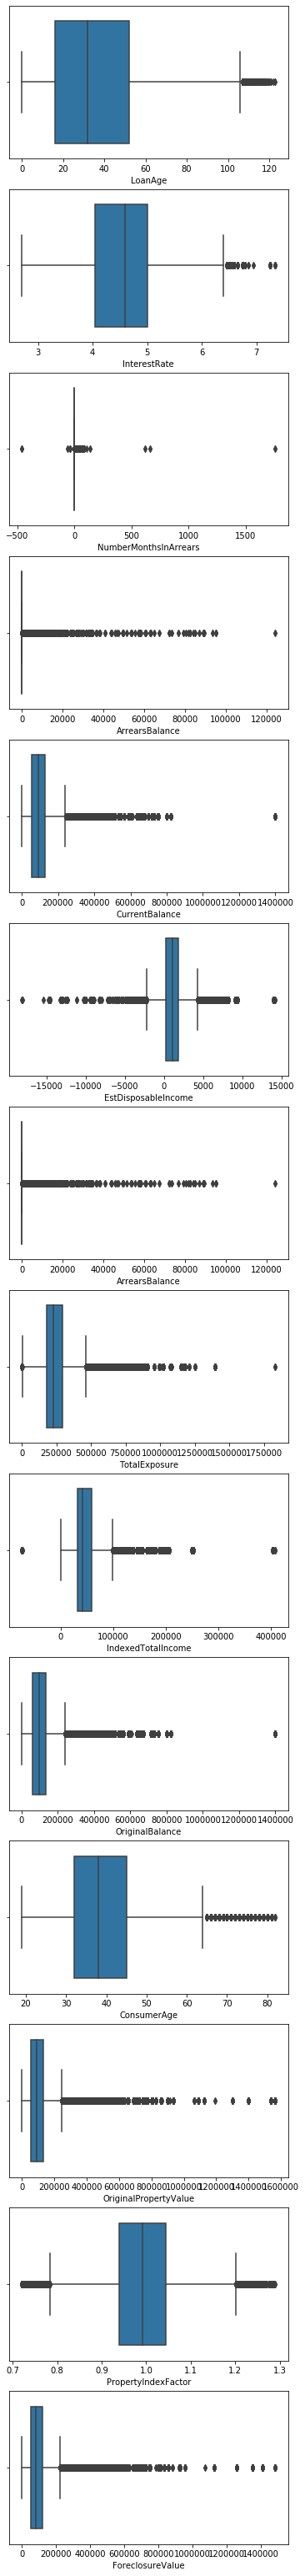

In [18]:
df1=df[['LoanAge', 'InterestRate',
       'NumberMonthsInArrears','ArrearsBalance', 'CurrentBalance', 'EstDisposableIncome',
       'ArrearsBalance', 'TotalExposure', 'IndexedTotalIncome',
       'OriginalBalance','ConsumerAge', 'OriginalPropertyValue',
       'PropertyIndexFactor', 'ForeclosureValue']]
n=len(df1.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*4))
for i in range(n):
    plt.sca(ax[i])
    sns.boxplot(df1.iloc[:,i])
plt.show()

#### Correct outliers

In [19]:
# negative month in arrears to 1, assume system error or typo
df['NumberMonthsInArrears'].loc[df['NumberMonthsInArrears']<0]=1

# total income should be always larger or equal to disposable income
df['IndexedTotalIncome'].loc[df['EstDisposableIncome']> df['IndexedTotalIncome']]=\
df['EstDisposableIncome'].loc[df['EstDisposableIncome']>df['IndexedTotalIncome']]\
* df['IndexedTotalIncome'].median()/df['EstDisposableIncome'].median()

# replace zero or negative income by a small value
df['IndexedTotalIncome'].loc[df['IndexedTotalIncome']<=0]=0.001

# replace the zero disposable income with a small value to prevent from dividing by zero, disposable income can be negative
df['EstDisposableIncome'].loc[df['EstDisposableIncome']==0]=0.001

### correct extrame values (input error, ect)
def check_correct(column,level):
    ref=df.groupby(level)[[column]].median()
    new = pd.merge(df,ref,how='left',left_on=level,right_index=True,suffixes=('_x', '_y'))
    new['check']=new[column+'_x']-new[column+'_y']
    df[column]=new[column+'_y']
    print(str(sum(new['check']!=0))+' number of records have been modified in varaible '+column)

check_correct('OriginalBalance', 'DebtID')
check_correct('OriginalPropertyValue','DebtID')
check_correct('ForeclosureValue','DebtID')
check_correct('TotalExposure','ConsumerID')

# we assume the current balance should be always not higher than its original balance
df['CurrentBalance']=np.minimum(df['OriginalBalance'],df['CurrentBalance'])

121 number of records have been modified in varaible OriginalBalance
105239 number of records have been modified in varaible OriginalPropertyValue
125402 number of records have been modified in varaible ForeclosureValue
53451 number of records have been modified in varaible TotalExposure


## Prepare Data

### Transform data to ConsumerID level

In [20]:
# Since the objective of this case is to calculate the expected delinquency probability of each customer, 
# we should transoform the data to ConsumerId level along the time dimension ReportDate: 
# for some variables that are already on ConsumerID level (e.g.income,age, ect), we take the median, 
# for other variables that on the DebtID level, we need to take the sum.
if os.path.isfile('data_cleaned.h5'):
    # load from the cache to save time
    df_all=pd.read_hdf('data_cleaned.h5', 'df_all')
else:
    df_all=pd.DataFrame()
    consumers=df['ConsumerID'].unique()
    for i,c in enumerate(consumers):
        print(i)
        df_sub=df[df['ConsumerID']==c]
        df_sub.reset_index(inplace=True,drop=True)
        df_sub['Interest']=df_sub['InterestRate']*df_sub['CurrentBalance']/100/12
        df_sub1=df_sub.groupby(['ReportDate'])['Interest',
                 'CurrentBalance',
                 'OriginalBalance',
                 'OriginalPropertyValue',
                 'ForeclosureValue'].sum()
        df_sub2=df_sub.groupby(['ReportDate'])['NumberMonthsInArrears',
                    'ArrearsBalance',
                    'EstDisposableIncome',
                    'IndexedTotalIncome',
                    'TotalExposure',
                    'ConsumerAge',
                    'PropertyIndexFactor',
                    'LoanAge'].median()
        df_per_consumer=pd.concat([df_sub1, df_sub2],sort=True,axis=1)
        df_per_consumer['ConsumerID']=c

        # choose the property region with the highest property value
        df_per_consumer['PropertyRegion']=df_sub['PropertyRegion'].iloc[df_sub['OriginalPropertyValue'].idxmax()]

        # Validate ArrearsBalance 
        diff_month=pd.Series(df_per_consumer.index).diff().dt.days/30
        diff_month.index=df_per_consumer.index
        diff_interest=diff_month*df_per_consumer['Interest']
        diff_arrears_balance=df_per_consumer['ArrearsBalance'].diff()
        flag_arrears_balance=diff_arrears_balance>diff_interest*1.1 # times 1.1 ArrearsBalanceto allow some trivial error/differences
        arrears_balance_ref=df_per_consumer['ArrearsBalance'].shift(periods=1,fill_value=0)+diff_interest.values
        df_per_consumer['ArrearsBalance'][flag_arrears_balance]=arrears_balance_ref[flag_arrears_balance]

        #################################################### Add extra features #############################################
        # income variables
        df_per_consumer['Payment2Income']=df_per_consumer['Interest']/df_per_consumer['IndexedTotalIncome'] 
        df_per_consumer['Payment2DisposableIncome']=df_per_consumer['Interest']/df_per_consumer['EstDisposableIncome']
        df_per_consumer['EstDisposableIncome_lag1']=df_per_consumer['EstDisposableIncome'].shift(periods=1)
        df_per_consumer['EstDisposableIncome_lag2']=df_per_consumer['EstDisposableIncome'].shift(periods=2)
        df_per_consumer['EstDisposableIncome_lag1'].fillna(df_per_consumer['EstDisposableIncome_lag1'].median(), inplace = True)
        df_per_consumer['EstDisposableIncome_lag2'].fillna(df_per_consumer['EstDisposableIncome_lag2'].median(), inplace = True)
        # number of loan parts for each consumer
        df_per_consumer['NumberLoanParts']=df_sub.DebtID.nunique() 
        # arrears balance change
        df_per_consumer['DiffArrearsBalance']=df_per_consumer['ArrearsBalance'].diff() 
        df_per_consumer['DiffArrearsBalance'].fillna(0,inplace=True)
        df_per_consumer['DiffArrearsBalance_lag1']=df_per_consumer['DiffArrearsBalance'].shift(periods=1,fill_value=0)
        df_per_consumer['DiffArrearsBalance_lag2']=df_per_consumer['DiffArrearsBalance'].shift(periods=2,fill_value=0)
        df_per_consumer['DiffArrearsBalance_lag3']=df_per_consumer['DiffArrearsBalance'].shift(periods=3,fill_value=0)
        df_per_consumer['DiffArrearsBalance_lag4']=df_per_consumer['DiffArrearsBalance'].shift(periods=4,fill_value=0)
        # early pay backs
        df_per_consumer['DiffBalance']=df_per_consumer['OriginalBalance']-df_per_consumer['CurrentBalance'] 
        # index factor
        df_per_consumer['PropertyIndexFactor_lag1']=df_per_consumer['PropertyIndexFactor'].shift(periods=1)
        df_per_consumer['PropertyIndexFactor_lag2']=df_per_consumer['PropertyIndexFactor'].shift(periods=2)
        df_per_consumer['PropertyIndexFactor_lag1'].fillna(df_per_consumer['PropertyIndexFactor_lag1'].median(), inplace = True)
        df_per_consumer['PropertyIndexFactor_lag2'].fillna(df_per_consumer['PropertyIndexFactor_lag2'].median(), inplace = True)
        # property value and foreclosure value
        df_per_consumer['AjustedPropertyValue']=df_per_consumer['OriginalPropertyValue']*df_per_consumer['PropertyIndexFactor']
        df_per_consumer['AjustedForeclosureValue']=df_per_consumer['ForeclosureValue']*df_per_consumer['PropertyIndexFactor']
        df_per_consumer['AjustedDepreciation']=df_per_consumer['AjustedPropertyValue']-df_per_consumer['AjustedForeclosureValue'] #depreciation and costs
        # month of report date 
        df_per_consumer['ReportMonth']=df_per_consumer.index.astype('datetime64[ns]').month 
        ##########################################################################################################################


        # Add forecast label (one step forward)
        df_per_consumer['delinquent']=(df_per_consumer['ArrearsBalance']>0).astype(int).shift(periods=-1,fill_value='Unknown')

        # Add persistant forecasting label (always use previous value to predict)
        df_per_consumer['delinquent_persistence']=(df_per_consumer['ArrearsBalance']>0).astype(int).shift(periods=1,fill_value=0)

        # Add another benchmark label (ever delinquent)
        df_per_consumer['ever_delinquent']=(df_per_consumer['ArrearsBalance'].max()>0).astype(int)
        
        # Append dataframe of each consumer
        df_all=pd.concat([df_all,df_per_consumer],axis=0)

# save the variable to cache
df_all.to_hdf('data_cleaned.h5', key='df_all', mode='w')

In [21]:
df_all.reset_index(inplace=True,drop=True)
df_visualize=df_all.loc[df_all['delinquent']!='Unknown',:]
print(df_visualize.describe())

            Interest  CurrentBalance  OriginalBalance  OriginalPropertyValue  \
count  171557.000000    1.715570e+05     1.715570e+05           1.715570e+05   
mean      920.141707    2.421502e+05     2.449296e+05           2.585746e+05   
std       464.524178    1.132927e+05     1.135037e+05           1.335765e+05   
min         0.000000    0.000000e+00     1.000000e+04           1.099671e+02   
25%       622.750000    1.722500e+05     1.739000e+05           1.799966e+05   
50%       832.291667    2.215000e+05     2.230000e+05           2.299954e+05   
75%      1103.833333    2.840000e+05     2.850000e+05           2.924980e+05   
max      8587.308333    1.833800e+06     1.833800e+06           2.027781e+06   

       ForeclosureValue  NumberMonthsInArrears  ArrearsBalance  \
count      1.715570e+05          171557.000000   171557.000000   
mean       2.324666e+05               0.059685       56.191112   
std        1.215675e+05               1.046812     1105.271658   
min        2.93

### Visulization

In [22]:
# all X candicates
columns =['Interest', 'CurrentBalance', 'OriginalBalance',
       'OriginalPropertyValue', 'ForeclosureValue', 'NumberMonthsInArrears',
       'ArrearsBalance', 'EstDisposableIncome', 'IndexedTotalIncome',
       'TotalExposure', 'ConsumerAge', 'PropertyIndexFactor', 'LoanAge',
       'PropertyRegion', 'Payment2Income',
       'Payment2DisposableIncome', 'EstDisposableIncome_lag1',
       'EstDisposableIncome_lag2', 'NumberLoanParts', 'DiffArrearsBalance',
       'DiffArrearsBalance_lag1', 'DiffArrearsBalance_lag2','DiffArrearsBalance_lag3', 'DiffArrearsBalance_lag4',
        'DiffBalance',
       'PropertyIndexFactor_lag1', 'PropertyIndexFactor_lag2',
       'AjustedPropertyValue', 'AjustedForeclosureValue',
       'AjustedDepreciation', 'ReportMonth']

#### OriginalPropertyValue

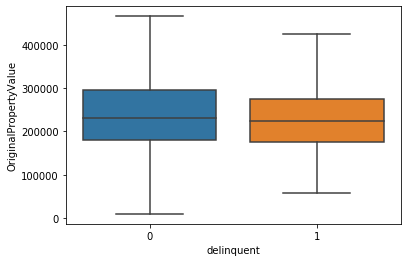

In [23]:
sns.boxplot(x=df_visualize['delinquent'],y=df_visualize['OriginalPropertyValue'],showfliers = False) 

#### EstDisposableIncome

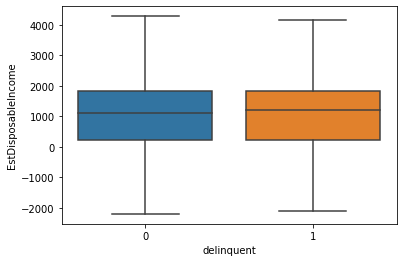

In [24]:
sns.boxplot(x=df_visualize['delinquent'],y=df_visualize['EstDisposableIncome'],showfliers = False)

#### Payment to income/disposable income ratio

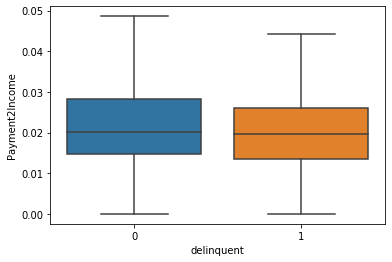

In [25]:
sns.boxplot(x=df_visualize['delinquent'],y=df_visualize['Payment2Income'],showfliers = False)

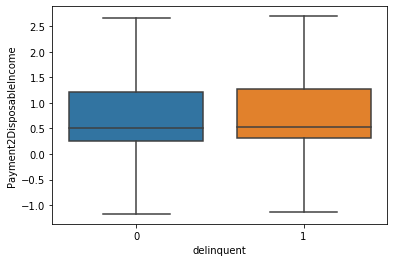

In [26]:
sns.boxplot(x=df_visualize['delinquent'],y=df_visualize['Payment2DisposableIncome'],showfliers = False)

#### Diff Balance (Early Paybacks)

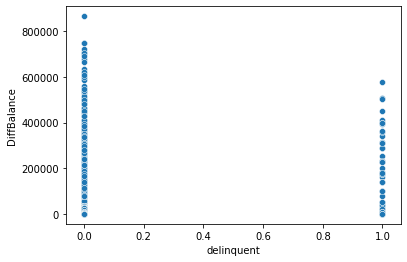

In [27]:
sns.scatterplot(x=df_visualize['delinquent'],y=df_visualize['DiffBalance'])

#### Consumer Age

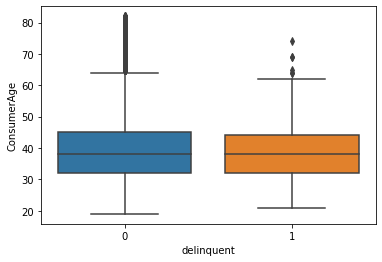

In [28]:
sns.boxplot(x=df_visualize['delinquent'],y=df_visualize['ConsumerAge'],showfliers = True)

#### Loan Age

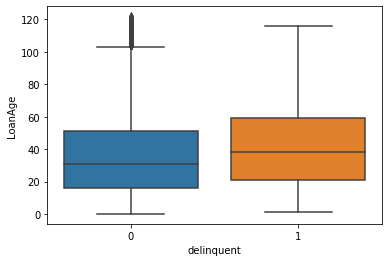

In [29]:
sns.boxplot(x=df_visualize['delinquent'],y=df_visualize['LoanAge'],showfliers = True)

#### Region

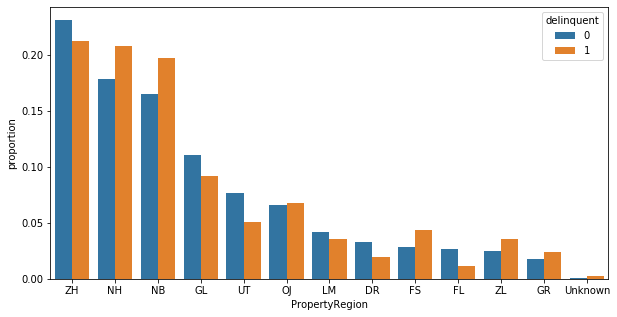

In [30]:
plt.figure(figsize=(10,5))
df_visualize['PropertyRegion']\
 .groupby(df_visualize['delinquent'])\
 .value_counts(normalize=True)\
 .rename('proportion')\
 .reset_index()\
 .pipe((sns.barplot, "data"), x='PropertyRegion', y='proportion', hue='delinquent')

#### Report Month

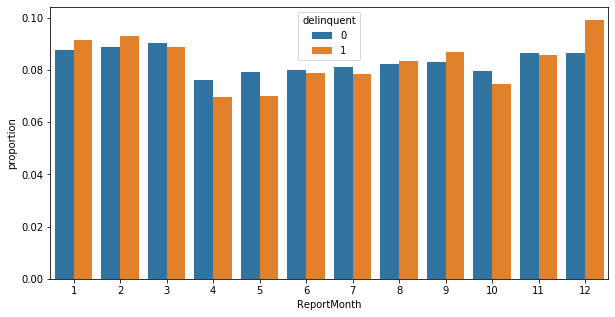

In [31]:
plt.figure(figsize=(10,5))
df_visualize['ReportMonth']\
 .groupby(df_visualize['delinquent'])\
 .value_counts(normalize=True)\
 .rename('proportion')\
 .reset_index()\
 .pipe((sns.barplot, "data"), x='ReportMonth', y='proportion', hue='delinquent')

#### Correlation

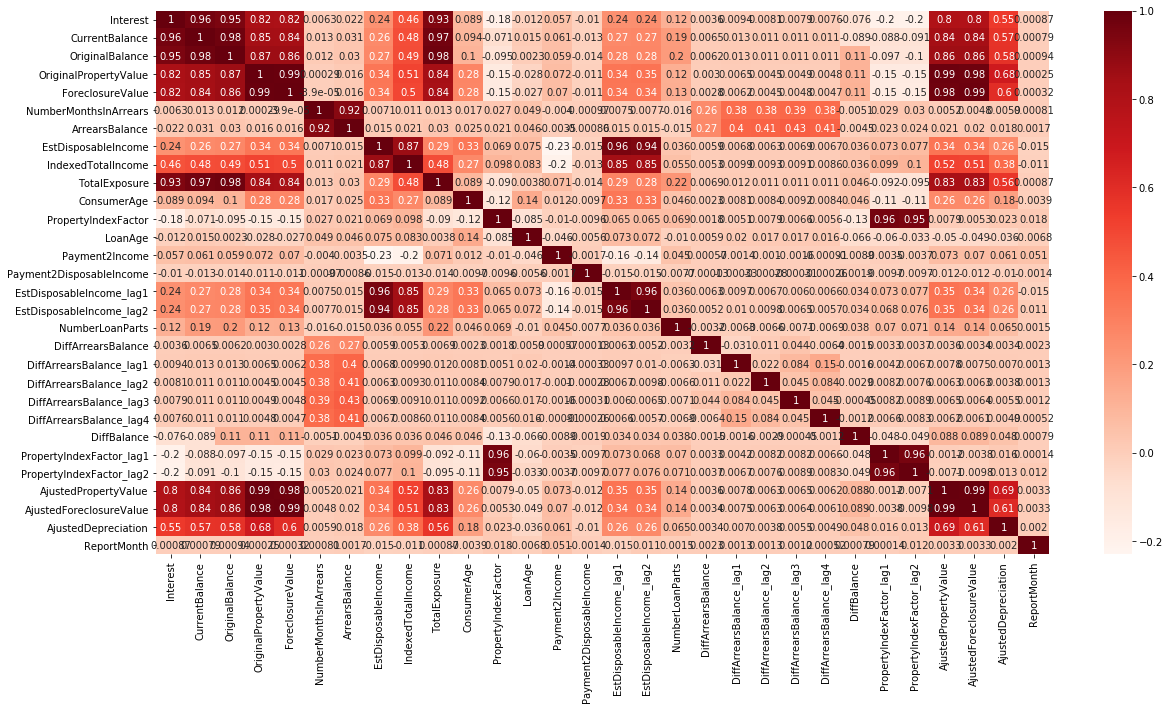

In [32]:
# correlation heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df_visualize[columns].corr(method='pearson'), annot=True, cmap = 'Reds')
plt.show()

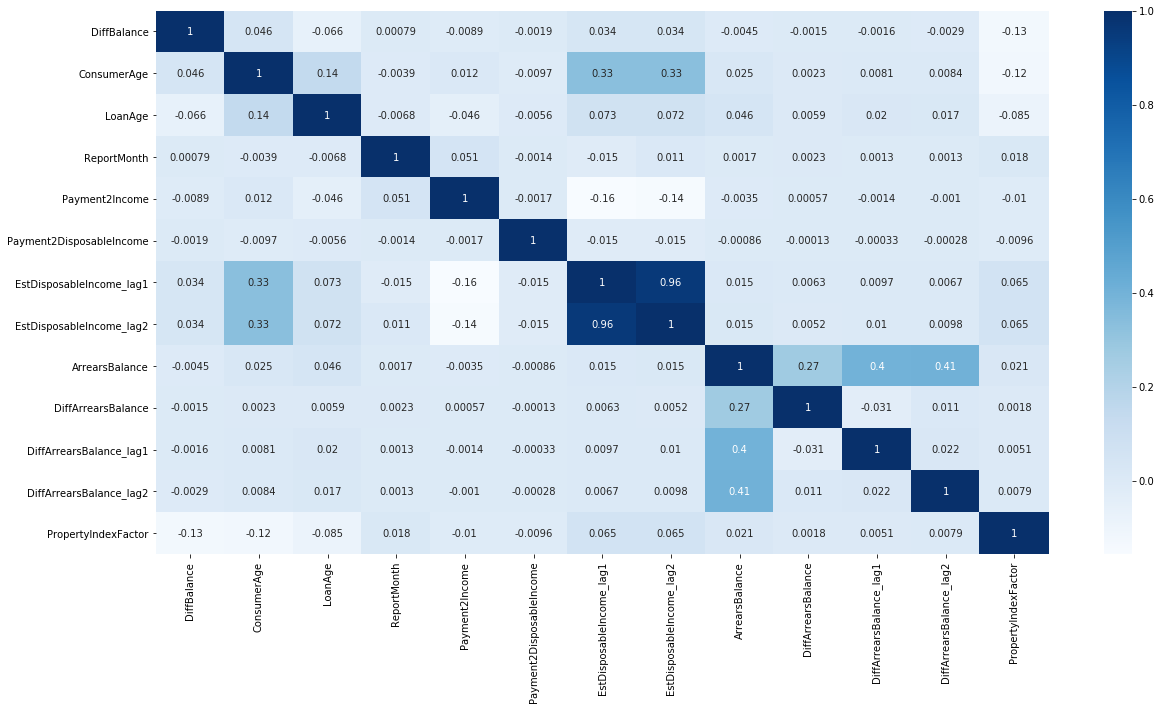

In [33]:
# select columns to prevent multicollinearity

columns_selected=['DiffBalance',
                  'ConsumerAge', 'LoanAge','ReportMonth',
                  'PropertyRegion', 'Payment2Income',
                  'Payment2DisposableIncome', 'EstDisposableIncome_lag1','EstDisposableIncome_lag2',
                  'ArrearsBalance','DiffArrearsBalance',
                  'DiffArrearsBalance_lag1', 'DiffArrearsBalance_lag2', 
                  'PropertyIndexFactor',
                  'delinquent','delinquent_persistence','ever_delinquent']


plt.figure(figsize = (20,10))
sns.heatmap(df_visualize[columns_selected[:-3]].corr(method='pearson'), annot=True, cmap = 'Blues')
plt.show()

#### ArrearsBalance of all consumers

In [34]:
arrears_balance_per_date=df.groupby('ReportDate')['ArrearsBalance'].sum()

Text(0.5, 1.0, 'Total Arrears Balance of All Consumers')

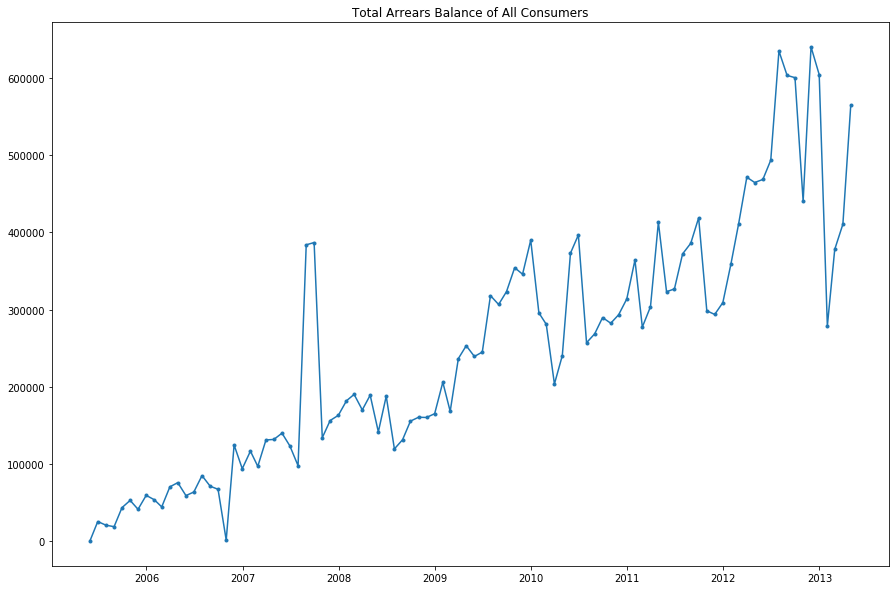

In [35]:
plt.figure(figsize = (15,10))
plt.plot(arrears_balance_per_date,'.-')
plt.title('Total Arrears Balance of All Consumers')

In [36]:
diff_arrears_balance_per_date=arrears_balance_per_date.diff()
diff_arrears_balance_per_date.fillna(0,inplace=True)

Text(0.5, 1.0, 'Total Arrears Balance Change (First Difference) of All Consumers')

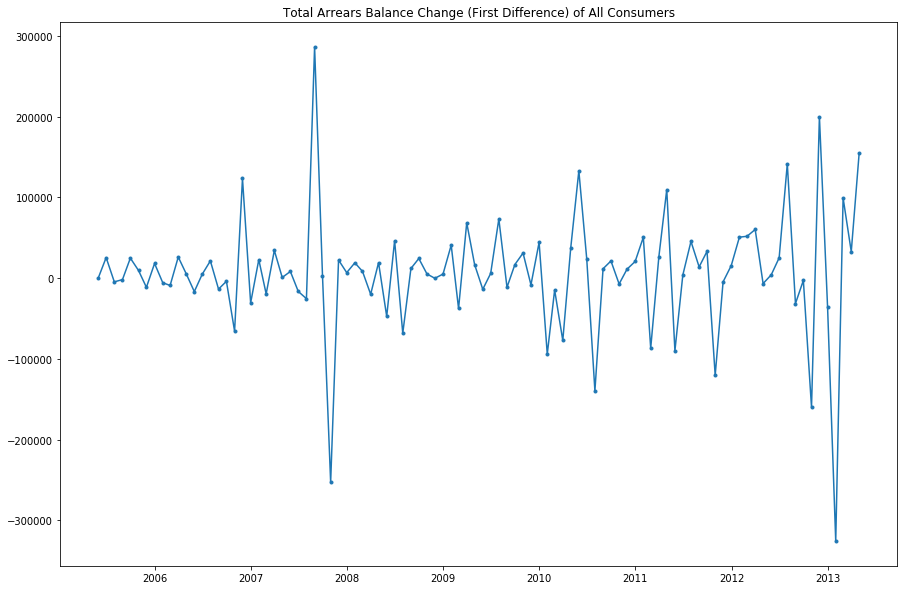

In [37]:
plt.figure(figsize = (15,10))
plt.plot(diff_arrears_balance_per_date,'.-')
plt.title('Total Arrears Balance Change (First Difference) of All Consumers')

### Split Training and Testing Sets

In [38]:
# create dummies
xy_all=pd.get_dummies(data=df_all[columns_selected+['ConsumerID']], columns=['PropertyRegion','ReportMonth'])
X=xy_all.loc[df_all['delinquent']!='Unknown',:]
X.drop(['delinquent','delinquent_persistence','ever_delinquent','ConsumerID'],axis=1,inplace=True)

# X forecast set (3000 consumers) uses the same dummy definition as the train and test sets
X_forecast=xy_all.loc[df_all['delinquent']=='Unknown',:]
ConsumerID=X_forecast['ConsumerID']
X_forecast.drop(['delinquent','delinquent_persistence','ever_delinquent','ConsumerID'],axis=1,inplace=True)

# y
y=xy_all.loc[xy_all['delinquent']!='Unknown',:]
y=y[['delinquent','delinquent_persistence','ever_delinquent']]

# use stratify to split: the positive/negative propotion remain approximately the same in each set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)

# y train
y_train=y_train['delinquent'].astype(int)

# y persistence prediction
y_pred_persistence=y_test['delinquent_persistence']

# y naive prediction (ever delinquent)
y_pred_naive=y_test['ever_delinquent']

# y test
y_test=y_test['delinquent'].astype(int)


# reset indices
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_forecast.reset_index(drop=True,inplace=True)

y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
y_pred_persistence.reset_index(drop=True,inplace=True)

## Classifier Selection 

### Evaluation Matrix
F0.5-Measure (beta=0.5): More weight on precision, less weight on recall. 
<br>  $F0.5= (1.25 * Precision * Recall) / (0.25 * Precision + Recall)$
***
F1-Measure (beta=1.0): Balance the weight on precision and recall. 
 <br>  $F1=(2 * Precision * Recall) / (Precision + Recall)$
***
F2-Measure (beta=2.0): Less weight on precision, more weight on recall.
<br> $F2=(5 * Precision * Recall) / (4 * Precision + Recall)$

In [39]:
# we use f2 score to give more weight on Recall
f2_scorer = make_scorer(fbeta_score, beta=2)

# 5 fold cross validation
kfold = KFold(n_splits=5, random_state=123,shuffle=True)

### Logistic Regression

In [40]:
pipe_lgr=Pipeline(steps=[('standardize', StandardScaler()),
                ('logistic', LogisticRegression(class_weight='balanced',random_state=123))])

# evaluate pipeline
results_lgr = cross_val_score(pipe_lgr, X_train.iloc[:,0:18], y_train, cv=kfold,scoring=f2_scorer)
print('mean= '+str(results_lgr.mean()))
print('min= '+str(results_lgr.min()))
print('max= '+str(results_lgr.max()))

mean= 0.6036370634047016
min= 0.5919294494922501
max= 0.6175742574257426


### Random Forest

In [41]:
pipe_rf=Pipeline(steps=[('standardize', StandardScaler()),
                ('rf', RandomForestClassifier(class_weight='balanced',random_state=123))])

# evaluate pipeline
results_rf = cross_val_score(pipe_rf, X_train, y_train, cv=kfold,scoring=f2_scorer)
print('mean= '+str(results_rf.mean()))
print('min= '+str(results_rf.min()))
print('max= '+str(results_rf.max()))

mean= 0.5496956717327143
min= 0.5237817332944266
max= 0.5660974067046174


### Xgboost

In [42]:
scale_pos_weight =sum(y_train==0)/sum(y_train==1) 
pipe_xgboost=Pipeline(steps=[('standardize', StandardScaler()),
                ('xgboost', XGBClassifier(scale_pos_weight=scale_pos_weight,eval_metric='logloss',random_state=123))])
# evaluate pipeline
results_xgboost = cross_val_score(pipe_xgboost, X_train, y_train, cv=kfold,scoring=f2_scorer)
print('mean= '+str(results_xgboost.mean()))
print('min= '+str(results_xgboost.min()))
print('max= '+str(results_xgboost.max()))  

mean= 0.6218171875827256
min= 0.591593149974053
max= 0.6470156555772995


## Grid Search Parameters

In [63]:
#### Grid search 
model_xgboost=Pipeline(steps=[('standardize', StandardScaler()),
                              ('xgboost', XGBClassifier( 
                                        booster='gbtree',
                                        objective='binary:logistic',
                                        eval_metric='logloss',
                                        learning_rate=0.3,
                                        random_state=123))])
params = {
        'xgboost__scale_pos_weight': [5,10,40],
        'xgboost__max_depth': [3,4,5]
        }

grid_rf = GridSearchCV(model_xgboost, param_grid=params, cv=5, n_jobs=-1,scoring=f2_scorer)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardize', StandardScaler()),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster='gbtree',
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      eval_metric='logloss',
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=0.3,
                                                      max_delta_step=None,
               

In [64]:
grid_rf.best_params_

{'xgboost__max_depth': 3, 'xgboost__scale_pos_weight': 10}

## Fit The Best Model

In [65]:
# apply standard scaler transform on the train set, and use its mean & std to transform test set
trans = StandardScaler()
X_train_scaled = trans.fit_transform(X_train)
X_test_scaled = trans.transform (X_test)
X_forecast_scaled=trans.transform (X_forecast)

# 
eval_set = [(X_train_scaled, y_train)]
model = XGBClassifier(random_state=123,
                      n_estimators=100,
                      gamma=0,
                      learning_rate=0.3,
                      booster='gbtree',
                      objective='binary:logistic',
                      scale_pos_weight=10,
                      max_depth=3)
model.fit(X_train_scaled, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.48070
[1]	validation_0-logloss:0.36078
[2]	validation_0-logloss:0.28524
[3]	validation_0-logloss:0.23537
[4]	validation_0-logloss:0.20122
[5]	validation_0-logloss:0.17767
[6]	validation_0-logloss:0.16133
[7]	validation_0-logloss:0.14983
[8]	validation_0-logloss:0.14153
[9]	validation_0-logloss:0.13584
[10]	validation_0-logloss:0.13159
[11]	validation_0-logloss:0.12855
[12]	validation_0-logloss:0.12666
[13]	validation_0-logloss:0.12503
[14]	validation_0-logloss:0.12398
[15]	validation_0-logloss:0.12314
[16]	validation_0-logloss:0.12245
[17]	validation_0-logloss:0.12180
[18]	validation_0-logloss:0.12114
[19]	validation_0-logloss:0.12079
[20]	validation_0-logloss:0.12051
[21]	validation_0-logloss:0.12020
[22]	validation_0-logloss:0.11993
[23]	validation_0-logloss:0.11962
[24]	validation_0-logloss:0.11951
[25]	validation_0-logloss:0.11933
[26]	validation_0-logloss:0.11920
[27]	validation_0-logloss:0.11901
[28]	validation_0-logloss:0.11884
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Precision-Recall Curve

Best Threshold=0.722447, F2-Score=0.656


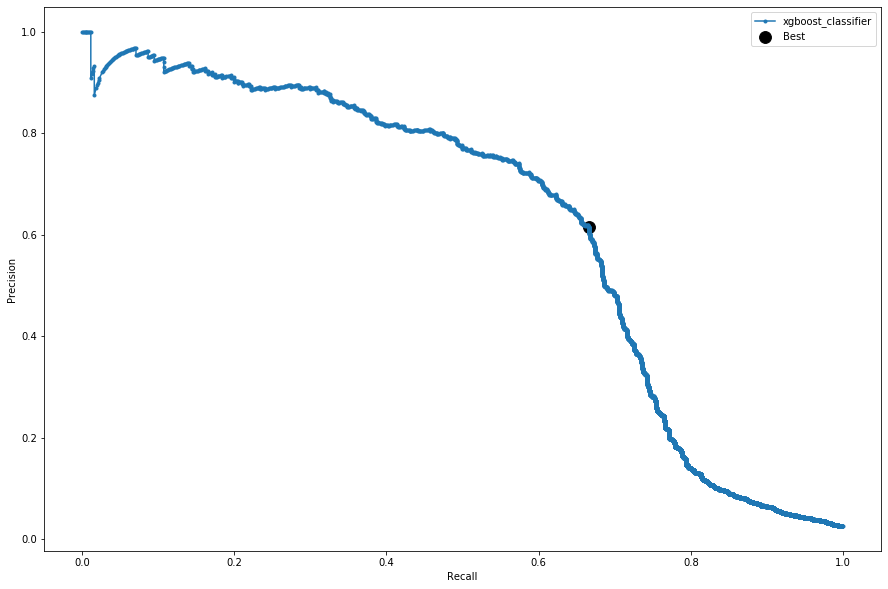

In [66]:
y_prob=model.predict_proba(X_test_scaled)
y_pred=model.predict(X_test_scaled)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:,1])

# convert to f2 score
f2score = (5 * precision * recall) / (4* precision + recall)
# locate the index of the largest f score
ix = np.argmax(f2score)
print('Best Threshold=%f, F2-Score=%.3f' % (thresholds[ix], f2score[ix]))

plt.figure(figsize = (15,10))
plt.plot(recall, precision, marker='.', label='xgboost_classifier')
plt.scatter(recall[ix], precision[ix], marker='o', s=140,color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Confusion Matrix

In [67]:
def display_result(y_test,y_pred):
    #printing the confusion matrix
    LABELS = ['Normal', 'Delinquent']
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    # Run classification metrics
    print('F2 Score is: '+ str(fbeta_score(y_test, y_pred, average=None, beta=2)[1]))
    print(classification_report(y_test, y_pred))
    

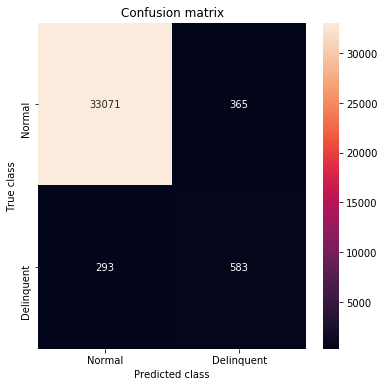

F2 Score is: 0.6547619047619048
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     33436
           1       0.61      0.67      0.64       876

    accuracy                           0.98     34312
   macro avg       0.80      0.83      0.81     34312
weighted avg       0.98      0.98      0.98     34312



In [68]:
y_pred=(y_prob[:,1]>thresholds[ix])
display_result(y_test,y_pred)    

### Feature Importance

In [69]:
importances = model.feature_importances_
df_importances= pd.DataFrame({'features': X.columns,'importances':importances})
df_importances=df_importances.sort_values(['importances'], ascending=False)
df_importances

,features,importances
7,ArrearsBalance,0.609140
8,DiffArrearsBalance,0.046142
10,DiffArrearsBalance_lag2,0.045428
9,DiffArrearsBalance_lag1,0.039355
11,PropertyIndexFactor,0.015004
26,ReportMonth_2,0.013191
15,PropertyRegion_GL,0.013051
12,PropertyRegion_DR,0.012598
0,DiffBalance,0.012295
17,PropertyRegion_LM,0.010910


## Compare with Bench Mark Models

### Bench Mark Model 1 (Naive Model)

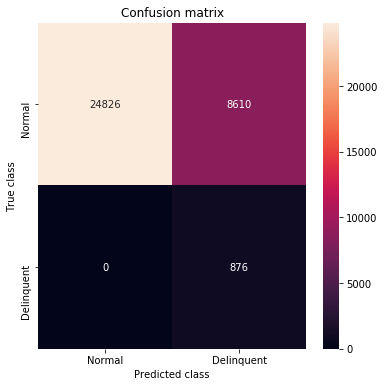

F2 Score is: 0.3371824480369515
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     33436
           1       0.09      1.00      0.17       876

    accuracy                           0.75     34312
   macro avg       0.55      0.87      0.51     34312
weighted avg       0.98      0.75      0.83     34312



In [70]:
display_result(y_test,y_pred_naive)    

### Bench Mark Model 2 (Persistence Model)

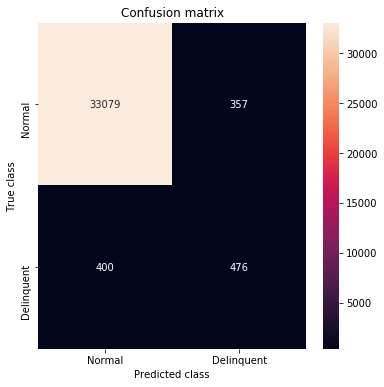

F2 Score is: 0.5487664284067327
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     33436
           1       0.57      0.54      0.56       876

    accuracy                           0.98     34312
   macro avg       0.78      0.77      0.77     34312
weighted avg       0.98      0.98      0.98     34312



In [71]:
display_result(y_test,y_pred_persistence)    

## Final Prediction

In [72]:
final_model=model
X_forecast_scaled=trans.transform (X_forecast)
prob=final_model.predict_proba(X_forecast_scaled)
result=pd.DataFrame()
result.prob=prob[:,1]
result.ConsumerID=ConsumerID.values

In [73]:
result = pd.DataFrame({'ConsumerID': ConsumerID.values,'DelinquentProbability':prob[:,1]})
result = result.sort_values(['DelinquentProbability'], ascending=False)
result

,ConsumerID,DelinquentProbability
1519,2677243,0.995660
807,2217162,0.995577
1901,2852665,0.995334
1147,2375943,0.995088
442,2052088,0.994774
583,2135898,0.994424
333,1979551,0.994348
2353,3012313,0.994238
876,2258166,0.993339
337,1982101,0.992364
